<a href="https://colab.research.google.com/github/hanhluukim/replication-topic-modelling-in-embedding-space/blob/main/notebook_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Das Projekt aus dem Github klonen und in den Projektsordner**

In [1]:
#wenn die Ordner noch nicht geklont ist, soll dieser Fehler zuerst durchgeführt werden.
!git clone https://github.com/hanhluukim/replication-topic-modelling-in-embedding-space.git

Cloning into 'replication-topic-modelling-in-embedding-space'...
remote: Enumerating objects: 1035, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1035 (delta 76), reused 131 (delta 67), pack-reused 895
Receiving objects: 100% (1035/1035), 489.18 MiB | 32.23 MiB/s, done.
Resolving deltas: 100% (527/527), done.
Checking out files: 100% (110/110), done.


In [1]:
cd /content/replication-topic-modelling-in-embedding-space

/content/replication-topic-modelling-in-embedding-space


#**Die benötige Paketen für das Projekt mittels requirements.txt installieren**



In [3]:
# Falls die Packages noch nicht installiert wurden, 
!pip install -r "/content/replication-topic-modelling-in-embedding-space/requirements.txt"

     |████████████████████████████████| 4.2 MB 4.9 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 28.8 MB 1.3 MB/s 
     |████████████████████████████████| 636 kB 58.0 MB/s 
     |████████████████████████████████| 79.9 MB 115 kB/s 
     |████████████████████████████████| 6.6 MB 58.3 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=782dd9b9d80a22a2dfebfade11184d2fb1f2d9744a4bc3b34d9c8128271458e9
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=7819cb986b37a055ade1b4f99b6f33294186f7a50fc6bc021398f543499137bc
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfu

# **Gebrauchte Paketen importieren**

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import umap.umap_ as umap
import time
import plotly.express as px
from sklearn import cluster
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# **Vorverarbeitung und BOW-Repräsentationen für Textdaten durchführen**
1. Vocabular erstellen
2. BOW-Repräsentationen für allen Teildatensätzen

In [4]:
from src.prepare_dataset import TextDataLoader

In [5]:
# init TextDataLoader für die Datenquelle 20 News Groups
# Daten abrufen vom Sklearn, tokenisieren und besondere Charaktern entfernen
textsloader = TextDataLoader(source="20newsgroups", train_size=None, test_size=None)
textsloader.load_tokenize_texts("20newsgroups")
# Beispiel von Textdaten
textsloader.show_example_raw_texts(n_docs=2)

loading texts: ...
train-size after loading: 11314
test-size after loading: 7532
finished load!
check some sample texts of the dataset after filter punctuation and digits
['From', ':', 'lerxst', '@', 'wam', '.', 'umd', '.', 'edu', '(', "where's", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp', 'Posting', 'Host', ':', 'rac3', '.', 'wam', '.', 'umd', '.', 'edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2', 'door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', '/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all

In [6]:
# Vorverarbeitung von Daten mit folgenden Schritten:
textsloader.preprocess_texts(length_one_remove=True, punctuation_lower = True, stopwords_filter = True)

start: preprocessing: ...
finised: preprocessing!


In [7]:
# Daten zerlegen für Train, Test und Validation. Erstellen Vocabular aus dem Trainset
min_df=2
textsloader.split_and_create_voca_from_trainset(max_df=0.7, min_df=min_df, stopwords_remove_from_voca=True)

test-document-frequency: 
[[55 55  5 ...  2  2  3]]
vocab-size in df: 57326
validation-size ist: 0.01
start creating vocabulary ...
length of the vocabulary: 54318
sample ten words of the vocabulary: ['ngis', 'burnaby', 'barth', 'raved', 'categories', 'prompts', 'sio', 'blizzard', 'jochen', 'emg']
length word2id list: 54318
length id2word list: 54318
finished: creating vocabulary


# **LDA Model**

In [8]:
#from src.evaluierung import topicCoherence
from src.lda import lda
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
from gensim.models.coherencemodel import CoherenceModel


# Erstellen BOW-Repräsentation für LDA Model
for_lda_model = True 
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)
gensim_corpus_train_set = train_set

docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
#lda model
print(100*"-")

ldamodel = lda(train_set,10,id2word)
lda_topics = ldamodel.show_topics(num_words=10)
topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
for topic in lda_topics:
    #print(topic)
    topics.append(preprocess_string(topic[1], filters))
for topic in topics:
  print(topic)
print(100*"-")
#tc = topicCoherence(topics,10,docs_tr,len(docs_tr))
#print(tc)

#----------using coherence from gensim-----
class DictObj:
  def __init__(self, word2id, id2word):
    self.id2token = id2word
    self.token2id = word2id

my_dict_obj = DictObj(word2id, id2word)
cm = CoherenceModel(topics=topics, texts = docs_tr, corpus = train_set, dictionary = my_dict_obj, coherence='u_mass')
print(f'coherrence from gensim: {cm.get_coherence()}')

train-size-after-all: 11214
test-size-after-all: 7532
validation-size-after-all: 100
length train-documents-indices : 1420825
length of the vocabulary: 54318


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

compact representation for LDA
----------------------------------------------------------------------------------------------------
['lad', 'sevres', 'emp', 'muohio', 'supercells', 'posses', 'musicb', 'cshrc', 'tists', 'wuarchive']
['feathr', 'gq', 'sct', 'computerwetenschappen', 'sendmail', 'abstract', 'goulet', 'panicking', 'ossi', 'krishnas']
['xauthority', 'albicans', 'sunbim', 'dogmatism', 'schwimmer', 'connects', 'posta', 'yz', 'fitchburg', 'touchscreen']
['performing', 'turists', 'saari', 'rou

# **Topic Coherrence of Authors**
1. Für Vergleich Ergebnisse zwischen eigener TC und TC von Authoren

In [9]:
# erstelllen die Daten nach ETM-Format damit man Author Evaluation benutzen kann
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=False)

train-size-after-all: 11214
test-size-after-all: 7532
validation-size-after-all: 100
length train-documents-indices : 1420825
length of the vocabulary: 54318


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

some id2word befor saving: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [10]:
import torch 
import numpy as np

def get_topic_diversity(beta, topk):
    num_topics = beta.shape[0]
    list_w = np.zeros((num_topics, topk))
    for k in range(num_topics):
        idx = beta[k,:].argsort()[-topk:][::-1]
        list_w[k,:] = idx
    n_unique = len(np.unique(list_w))
    TD = n_unique / (topk * num_topics)
    print('Topic diveristy is: {}'.format(TD))
    return TD

def get_document_frequency(data, wi, wj=None):
    if wj is None:
        D_wi = 0
        for l in range(len(data)):
            doc = data[l]#.squeeze(0)
            if len(doc) == 1: 
                continue
            else:
                doc = doc#.squeeze()
            if wi in doc:
                D_wi += 1
        return D_wi
    D_wj = 0
    D_wi_wj = 0
    for l in range(len(data)):
        doc = data[l]#.squeeze(0)
        """
        if len(doc) == 1: 
            doc = [doc.squeeze()]
        else:
            doc = doc.squeeze()
        """
        if wj in doc:
            D_wj += 1
            if wi in doc:
                D_wi_wj += 1
    return D_wj, D_wi_wj 

def get_topic_coherence(data, top10words_topics, word2id):
    #data should be document in word-ids
    D = len(data) ## number of docs...data is list of documents
    print('D: ', D)
    TC = []
    num_topics = len(top10words_topics)
    for k in range(num_topics):
        print('k: {}/{}'.format(k, num_topics))
        top_words = top10words_topics[k] #[vocab[a] for a in top_10]
        top_10 = [word2id[idx] for idx in top_words]
        TC_k = 0
        counter = 0
        for i, word_id in enumerate(top_10):
            # get D(w_i)
            D_wi = get_document_frequency(data, word_id)
            j = i + 1
            tmp = 0
            while j < len(top_10) and j > i:
                # get D(w_j) and D(w_i, w_j)
                D_wj, D_wi_wj = get_document_frequency(data, word_id, top_10[j])
                # get f(w_i, w_j)
                if D_wi_wj == 0:
                    f_wi_wj = -1
                else:
                    f_wi_wj = -1 + ( np.log(D_wi) + np.log(D_wj)  - 2.0 * np.log(D) ) / ( np.log(D_wi_wj) - np.log(D) )
                # update tmp: 
                tmp += f_wi_wj
                j += 1
                counter += 1
            # update TC_k
            TC_k += tmp 
        TC.append(TC_k)
    print('counter: ', counter)
    print('num topics: ', len(TC))
    TC = np.mean(TC) / counter
    print('Topic coherence is: {}'.format(TC))
    return TC



In [11]:
#topic LDA but evlauation of authors coherence
top10words_topics = topics
get_topic_coherence(list(train_set['tokens']), top10words_topics, word2id)

D:  11214
k: 0/10
k: 1/10
k: 2/10
k: 3/10
k: 4/10
k: 5/10
k: 6/10
k: 7/10
k: 8/10
k: 9/10
counter:  45
num topics:  10
Topic coherence is: -0.9720816758062256


# **Data for ETM**

In [12]:
# Erstellen BOW-Repräsentation für ETM Modell
for_lda_model = False
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)


train-size-after-all: 11214
test-size-after-all: 7532
validation-size-after-all: 100
length train-documents-indices : 1420825
length of the vocabulary: 54318


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

some id2word befor saving: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


# **Vocabular und IDs anzeigen als Beispiel**

---





In [13]:
# show for samples: 100 word2id and id2 word
word2id_df_100 = pd.DataFrame()
word2id_df_100['word'] = list(word2id.keys())[:100]
word2id_df_100['id'] = list(word2id.values())[:100]
word2id_df_100

word  id
0          ngis   0
1       burnaby   1
2         barth   2
3         raved   3
4    categories   4
..          ...  ..
95    weintraub  95
96          ppe  96
97     tampered  97
98      dumping  98
99  reverberate  99

[100 rows x 2 columns]

# **Die Größe von Datensätzen kontrollieren**

In [14]:
# Kontrollieren die Größen von verschiedenen Datensätzen
print(f'Size of the vocabulary after prprocessing ist: {len(textsloader.vocabulary)}')
print(f'Size of train set: {len(train_set["tokens"])}')
print(f'Size of val set: {len(val_set["tokens"])}')
print(f'Size of test set: {len(test_set["test"]["tokens"])}')

Size of the vocabulary after prprocessing ist: 54318
Size of train set: 11214
Size of val set: 100
Size of test set: 7532


# **Dokumenten wiederstellen für Word2Vec Embedding**

---



In [15]:
# re-erstellen von Dokumenten nach der Vorverarbeitungen. Die Dokumenten sind in Wörtern und werden für Word-Embedding Training benutzt
docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
train_docs_df = pd.DataFrame()
train_docs_df['text-after-preprocessing'] = [' '.join(doc) for doc in docs_tr[:100]]
train_docs_df

text-after-preprocessing
0   biochem nwu jackson swimming pool defense nntp...
1   goykhman apollo hp red herring police state us...
2   hades coos dartmouth brian hughes installing r...
3   jaeger buphy bu gregg jaeger inimitable rushdi...
4   sysmgr king eng umd doug mohney boom whoosh co...
..                                                ...
95  rcampbel weejordy physics mun ca roderick camp...
96  jiml strauss ftcollinsco ncr jim sharp parts i...
97  sera zuma serdar argic nazi germany armenians ...
98  chips astro ocis temple charlie mathew bible r...
99  loss ece cmu doug loss crazy imaginitive elect...

[100 rows x 1 columns]

# **Word-Embedding trainieren mit dem Traindatensatz**

In [16]:
from src.embedding import WordEmbeddingCreator
from pathlib import Path

save_path = Path.joinpath(Path.cwd(), f'prepared_data/min_df_{min_df}')
figures_path = Path.joinpath(Path.cwd(), f'figures/min_df_{min_df}')
Path(figures_path).mkdir(parents=True, exist_ok=True)

wb_creator = WordEmbeddingCreator(model_name="skipgram", documents = docs_tr, save_path= save_path)
wb_creator.train(min_count=0, embedding_size= 300)
vocab = list(word2id.keys())
wb_creator.create_and_save_vocab_embedding(vocab, save_path)
wb_creator.cluster_words(save_path, figures_path, n_components=2, text = False)

train begin:word-embedding with skipgram
word-embedding train finished
length of vocabulary from word-embedding model 54318
length of the vocabulary of prepraring-dataset-vocabulary: 54318


100%|██████████| 54318/54318 [00:42<00:00, 1266.41it/s]
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


True

In [17]:
v = list(wb_creator.model.wv.vocab)[0]
vec = list(wb_creator.model.wv.__getitem__(v))
print(f'word-embedding of the word-- {v}: ')
print(f'vector: {vec}')
print(f'dim of vector: {len(vec)}')

word-embedding of the word-- biochem: 
vector: [-0.09136171, -0.023972945, -0.09734317, -0.023866346, -0.021410104, -0.089506514, 0.030177293, -0.037149273, 0.019283725, -0.05281344, -0.057950333, 0.12414345, -0.1360875, -0.12933856, -0.018288514, 0.018747818, -0.026179112, -0.09913658, 0.049777053, 0.015053281, -0.038645495, -0.0040401556, 0.07749686, 0.046229005, -0.03771079, -0.037227377, 0.14383882, 0.120592244, 0.055664554, -0.10420872, 0.059096176, 0.03708259, -0.054230697, -0.06359131, 0.13311933, 0.062034, 0.007486003, 0.15598448, -0.07674572, 0.058746345, 0.07811036, -0.022191038, -0.10780549, -0.1462938, -0.08219894, 0.0077794245, -0.039941333, -0.073727116, 0.09561039, 0.04238297, -0.04798039, -0.05756973, 0.10456377, -0.02674001, 0.07381845, -0.08752297, 0.012712382, -0.13350865, -0.01229955, -0.021735702, 0.0562747, 0.07921293, 0.043122035, 0.0280513, -0.13354781, 0.012697273, -0.02047013, 0.113977, 0.020027744, 0.027575597, 0.030434592, 0.0066094603, -0.08871202, -0.01474

In [18]:
print("neighbor words of some sample selected words")
for i in range(0,5):
      print(f'neighbor of word {vocab[i]}')
      print([r[0] for r in wb_creator.find_most_similar_words(n_neighbor=5, word=vocab[i])])
      print([r[1] for r in wb_creator.find_most_similar_words(n_neighbor=5, word=vocab[i])])
      print(100*"-")

neighbor words of some sample selected words
neighbor of word ngis
['engrg', 'nimios', 'alanchem', 'rflab', 'uglv']
[0.9819692373275757, 0.9807934165000916, 0.980481743812561, 0.9804719686508179, 0.9790764451026917]
----------------------------------------------------------------------------------------------------
neighbor of word burnaby
['scotia', 'windsor', 'antonio', 'erindale', 'waterloo']
[0.9677186608314514, 0.9482693076133728, 0.9474078416824341, 0.9323853254318237, 0.9315541982650757]
----------------------------------------------------------------------------------------------------
neighbor of word barth
['nazareth', 'maccabees', 'niv', 'patently', 'nicodemus']
[0.8720648288726807, 0.8697366714477539, 0.8551383018493652, 0.8388840556144714, 0.8386175632476807]
----------------------------------------------------------------------------------------------------
neighbor of word raved
['tempered', 'excitement', 'insightful', 'bowl', 'slipped']
[0.9305425882339478, 0.9284813404

# **Word-Embeddings visualieren als Beispiel**


In [19]:
"""
# read word-embedding files
with open(save_path) as f:
  lines = f.readlines()
embedding_data = []
words_data = []
for t in lines:
  w = t.split("\t")[0]
  v = [float(e) for e in t.split("\t")[1].split(" ")]
  words_data.append(w)
  embedding_data.append(v)

# clustering words with KMeans and Words-Vectors
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(embedding_data)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
#print ("Centroids data")
#print (centroids)


# dimension reduction with umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(embedding_data)
print('Duration: {} seconds'.format(time.time() - start))

# show samples after dim-reduction in dataframe
wb = pd.DataFrame(embedding, columns=['x', 'y', 'z'])
wb['word'] = words_data
wb['cluster'] = ['cluster ' + str(c) for c in labels]

# visualization
fig = px.scatter_3d(wb, 
                    text = wb['word'],
                    x='x', y='y', z='z',
                    color = wb['cluster'],
                    title ="word-embedding-samples")
fig.show()
"""

'\n# read word-embedding files\nwith open(save_path) as f:\n  lines = f.readlines()\nembedding_data = []\nwords_data = []\nfor t in lines:\n  w = t.split("\t")[0]\n  v = [float(e) for e in t.split("\t")[1].split(" ")]\n  words_data.append(w)\n  embedding_data.append(v)\n\n# clustering words with KMeans and Words-Vectors\nkmeans = cluster.KMeans(n_clusters=10)\nkmeans.fit(embedding_data)\n \nlabels = kmeans.labels_\ncentroids = kmeans.cluster_centers_\n \nprint ("Cluster id labels for inputted data")\nprint (labels)\n#print ("Centroids data")\n#print (centroids)\n\n\n# dimension reduction with umap\nstart = time.time()\nreducer = umap.UMAP(random_state=42,n_components=3)\nembedding = reducer.fit_transform(embedding_data)\nprint(\'Duration: {} seconds\'.format(time.time() - start))\n\n# show samples after dim-reduction in dataframe\nwb = pd.DataFrame(embedding, columns=[\'x\', \'y\', \'z\'])\nwb[\'word\'] = words_data\nwb[\'cluster\'] = [\'cluster \' + str(c) for c in labels]\n\n# visual

# **ETM Model**

ETM hat die Architektur eines Variational Autoencoders. 
ETM wird mit den pretrainierten Embedding kombiniert. Die Embeddings für Topics werden als Gewichten eines Teiles des Netzes aktualiert mittels der ELBO Loss

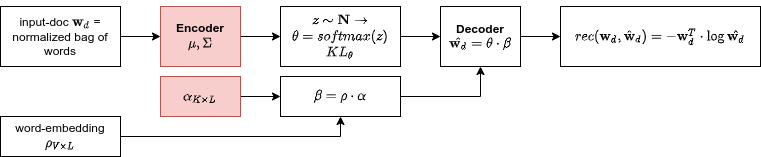

In [19]:
# using DocSet to use easier the modul DataSet from torch
from src.train_etm import DocSet, TrainETM
from src.etm import ETM
import torch

vocab_size = len(list(word2id.keys()))
tr_set = DocSet("train", vocab_size, train_set, normalize_data=True)
print(f'number train-samples: {len(tr_set)}')
print(f'sum of sample vector: {sum(tr_set.__getitem__(0))}')
print(f'length of sample vector: {torch.norm(tr_set.__getitem__(0))}')

number train-samples: 11214
sum of sample vector: 0.9999997615814209
length of sample vector: 0.13754893839359283


**Trainingsparametern vorbereiten**




In [20]:
class TrainArguments:
      def __init__(self, epochs, batch_size, log_interval):
          self.epochs = epochs
          self.batch_size = batch_size
          self.log_interval = log_interval

class OptimizerArguments:
      def __init__(self, optimizer_name, lr, wdecay):
            self.optimizer = optimizer_name
            self.lr = lr
            self.wdecay = wdecay
            
train_args = TrainArguments(epochs=10, batch_size=1000, log_interval=None)
optimizer_args = OptimizerArguments(optimizer_name="adam", lr=0.002, wdecay=0.1)
print(train_args.epochs)
print(optimizer_args.optimizer)

from src.embedding import read_prefitted_embedding
embedding_data = read_prefitted_embedding(vocab, save_path)
num_topics = 10
t_hidden_size = 800
rho_size = len(embedding_data[0])
emb_size = len(embedding_data[0])
theta_act = "tanh"

10
adam


**ETM initialisieren**

ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): Tanh()
  (topic_embeddings_alphas): Linear(in_features=300, out_features=10, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=54318, out_features=800, bias=True)
    (1): Tanh()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): Tanh()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
)
number of batches: 11
Epoch: 1/10  -  Loss: 10.74118 	 Rec: 10.74078 	 KL: 0.0004
Epoch: 2/10  -  Loss: 10.519 	 Rec: 10.51893 	 KL: 7e-05
Epoch: 3/10  -  Loss: 10.35507 	 Rec: 10.35496 	 KL: 0.00011
Epoch: 4/10  -  Loss: 10.25062 	 Rec: 10.25057 	 KL: 4e-05
Epoch: 5/10  -  Loss: 10.19036 	 Rec: 10.19033 	 KL: 3e-05
Epoch: 6/10  -  Loss: 10.15717 	 Rec: 10.15713 	 KL: 4e-05
Epoch: 7/10  -  Loss: 10.13882 	 Rec: 10.13877 	 KL: 5e-05
Epoch: 8/10  -  Loss: 10.12884 	 Rec: 10.12878 	 KL: 6e-05
Epoch: 9/10  -  Loss: 1

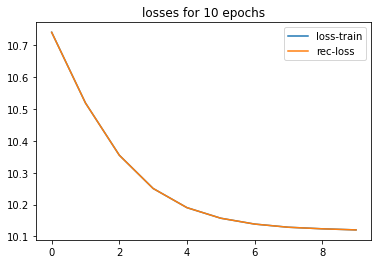

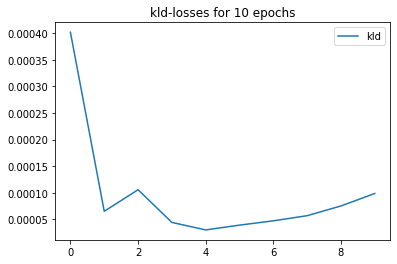

tensor([1.6667e-05, 1.5502e-05, 1.6073e-05,  ..., 1.4079e-05, 1.7377e-05,
        1.5620e-05], device='cuda:0')
tensor(1.0000, device='cuda:0')
[('max', 0.0005908789462409914), ('host', 0.00027996074641123414), ('nntp', 0.0002510554331820458), ('dos', 0.0002326063549844548), ('posting', 0.00019104022067040205), ('scsi', 0.0001888252008939162), ('db', 0.00017992481298279017), ('ohio', 0.0001702396693872288), ('cs', 0.00015532731777057052), ('ca', 0.00015415949746966362)]
[('max', 0.0008217658614739776), ('host', 0.00042817354551516473), ('nntp', 0.0003756743099074811), ('dos', 0.0002926892484538257), ('posting', 0.0002746587560977787), ('db', 0.00023432981106452644), ('scsi', 0.0002341112558497116), ('ohio', 0.0002189746155636385), ('cs', 0.0002004850684897974), ('ca', 0.00019672123016789556)]
[('max', 0.0009442127193324268), ('host', 0.0004914521123282611), ('nntp', 0.0004296641855034977), ('dos', 0.0003235284239053726), ('posting', 0.0003090875397901982), ('db', 0.00025847277720458806

In [17]:
#--------------------------training----------------------------------------------------
#del etm_model
# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, 
      enc_drop=0.5)

print(etm_model)

loss_name = "cross-entropy"

train_class = TrainETM().train(
    etm_model,
    loss_name,
    vocab_size, 
    train_args, optimizer_args, train_set,
    normalize_data = True,
    figures_path = figures_path)
    #num_topics, t_hidden_size, rho_size, emb_size, theta_act,  embedding_data, 0.5)

#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
for tp in topics:
  print(tp)

In [18]:
#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
topics = [[e[0] for e in tp] for tp in topics] #get only top words
for tp in topics:
  print(tp)
get_topic_coherence(list(train_set['tokens']), topics, word2id)


tensor([1.6667e-05, 1.5502e-05, 1.6073e-05,  ..., 1.4079e-05, 1.7377e-05,
        1.5620e-05], device='cuda:0')
tensor(1.0000, device='cuda:0')
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'db', 'scsi', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'db', 'scsi', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'posting', 'dos', 'db', 'ohio', 'scsi', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'db', 'scsi', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
['max', 'host', 'nntp', 'dos', 'posting', 'scsi', 'db', 'ohio', 'cs', 'ca']
D:  11214
k: 0/10
k: 1/10
k: 2/10
k: 3/10
k: 4/10
k: 5/10
k: 6/10
k: 7/10
k: 8/10
k: 9/10
counte

# **other-loss**

In [21]:
# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, 
      enc_drop=0.5)

print(etm_model)

ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): Tanh()
  (topic_embeddings_alphas): Linear(in_features=300, out_features=10, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=54318, out_features=800, bias=True)
    (1): Tanh()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): Tanh()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
)


**trainieren**

number of batches: 11
Epoch: 1/10  -  Loss: 589336.0 	 Rec: 589336.0 	 KL: 0.01463
Epoch: 2/10  -  Loss: 589335.3125 	 Rec: 589335.3125 	 KL: 0.00532
Epoch: 3/10  -  Loss: 589335.125 	 Rec: 589335.125 	 KL: 0.00128
Epoch: 4/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 0.0012
Epoch: 5/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 0.00091
Epoch: 6/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 0.00054
Epoch: 7/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 0.00028
Epoch: 8/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 0.00014
Epoch: 9/10  -  Loss: 589335.0625 	 Rec: 589335.0625 	 KL: 8e-05
Epoch: 10/10  -  Loss: 589335.0 	 Rec: 589335.0 	 KL: 5e-05
Checkpoint saved at checkpoints/etm_epoch_10.pth.tar


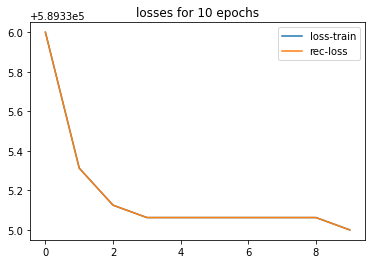

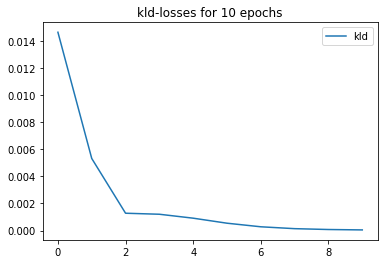

tensor([1.8407e-05, 1.8439e-05, 1.8406e-05,  ..., 1.8416e-05, 1.8505e-05,
        1.8416e-05], device='cuda:0')
tensor(1.0000, device='cuda:0')
[('bill', 1.995044840441551e-05), ('system', 1.975238774321042e-05), ('gov', 1.971999699890148e-05), ('nasa', 1.9695256924023852e-05), ('att', 1.9564493413781747e-05), ('world', 1.9496032109600492e-05), ('toronto', 1.9391887690289877e-05), ('ibm', 1.9287976101622917e-05), ('gun', 1.9268733012722805e-05), ('uk', 1.926025106513407e-05)]
[('david', 1.975254599528853e-05), ('org', 1.9629042071755975e-05), ('mil', 1.9481587514746934e-05), ('end', 1.9468368918751366e-05), ('michael', 1.945732037711423e-05), ('power', 1.9348337445990182e-05), ('ca', 1.930655344040133e-05), ('appears', 1.926331788126845e-05), ('fi', 1.9258370230090804e-05), ('article', 1.9186671124771237e-05)]
[('computer', 2.0007642888231203e-05), ('ca', 1.9841589164570905e-05), ('space', 1.9637762306956574e-05), ('ibm', 1.9628640075097792e-05), ('david', 1.9562960005714558e-05), ('wo

In [22]:
#--------------------------training----------------------------------------------------
loss_name = "paper-loss"

train_class = TrainETM().train(
    etm_model,
    loss_name,
    vocab_size, 
    train_args, optimizer_args, train_set,
    normalize_data = True,
    figures_path = figures_path)
    #num_topics, t_hidden_size, rho_size, emb_size, theta_act,  embedding_data, 0.5)

#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
for tp in topics:
  print(tp)

#----------------
from src.visualization import show_embedding_with_kmeans_umap
show_embedding_with_kmeans_umap(
    id2word, embedding_data, num_topics, etm_model.topic_embeddings_alphas.weight,
    figures_path)

In [23]:
#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
topics = [[e[0] for e in tp] for tp in topics] #get only top words
for tp in topics:
  print(tp)
get_topic_coherence(list(train_set['tokens']), topics, word2id)


tensor([1.8407e-05, 1.8439e-05, 1.8406e-05,  ..., 1.8416e-05, 1.8505e-05,
        1.8416e-05], device='cuda:0')
tensor(1.0000, device='cuda:0')
['bill', 'system', 'gov', 'nasa', 'att', 'world', 'toronto', 'ibm', 'gun', 'uk']
['david', 'org', 'mil', 'end', 'michael', 'power', 'ca', 'appears', 'fi', 'article']
['computer', 'ca', 'space', 'ibm', 'david', 'world', 'hp', 'big', 'harvard', 'stratus']
['colorado', 'years', 'time', 'good', 'state', 'mail', 'system', 'drive', 'people', 'news']
['time', 'al', 'world', 'bit', 'make', 'call', 'free', 'adam', 'sgi', 'life']
['work', 'michael', 'question', 'nntp', 'reply', 'power', 'uiuc', 'today', 'posting', 'pitt']
['distribution', 'time', 'research', 'mil', 'questions', 'god', 'silver', 'indiana', 'states', 'cwru']
['system', 'net', 'state', 'good', 'science', 'sun', 'opinions', 'public', 'virginia', 'gov']
['article', 'cc', 'information', 'people', 'mail', 'windows', 'day', 'state', 'au', 'david']
['apple', 'space', 'david', 'writes', 'part', 'n

epochs 150

ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): Tanh()
  (topic_embeddings_alphas): Linear(in_features=300, out_features=10, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=54318, out_features=800, bias=True)
    (1): Tanh()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): Tanh()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
)
number of batches: 11
Epoch: 1/100  -  Loss: 589453.75 	 Rec: 589453.75 	 KL: 0.01613
Epoch: 2/100  -  Loss: 589453.0625 	 Rec: 589453.0625 	 KL: 0.00529
Epoch: 3/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 0.00122
Epoch: 4/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 0.00065
Epoch: 5/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 0.00036
Epoch: 6/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 0.00018
Epoch: 7/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 9e-05
Epoch: 8/100  -  Loss: 589453.0 	 Rec: 589453.0 	 KL: 4e

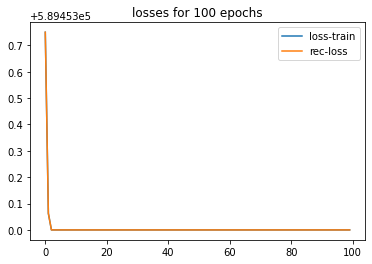

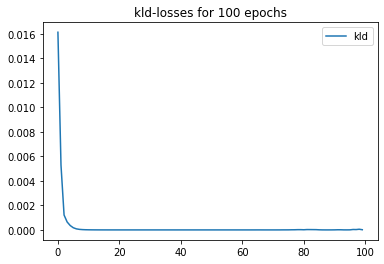

tensor([1.8424e-05, 1.8426e-05, 1.8409e-05,  ..., 1.8410e-05, 1.8405e-05,
        1.8415e-05], device='cuda:0')
tensor(1., device='cuda:0')
[('att', 1.8441305655869655e-05), ('csd', 1.8439946870785207e-05), ('golchowy', 1.8439321138430387e-05), ('cb', 1.8439022824168205e-05), ('uc', 1.8439019186189398e-05), ('uwa', 1.8439013729221188e-05), ('ucs', 1.8438729966874234e-05), ('msu', 1.843868631112855e-05), ('cbnews', 1.84384552994743e-05), ('wa', 1.8437915059621446e-05)]
[('article', 1.8443704902892932e-05), ('ucs', 1.8442762666381896e-05), ('nl', 1.8435863239574246e-05), ('indiana', 1.843484460550826e-05), ('mot', 1.8434006051393226e-05), ('ecn', 1.8433856894262135e-05), ('cae', 1.843347490648739e-05), ('laissez', 1.843346944951918e-05), ('reply', 1.8433165678288788e-05), ('nj', 1.8432881915941834e-05)]
[('csd', 1.8439164705341682e-05), ('hcf', 1.8438875486026518e-05), ('uc', 1.8438093320582993e-05), ('golchowy', 1.8437642211210914e-05), ('msu', 1.8436878235661425e-05), ('ca', 1.84367690

In [24]:
del etm_model
del train_class

# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, 
      enc_drop=0.5)

print(etm_model)
#--------------------------training----------------------------------------------------
loss_name = "paper-loss"
train_args = TrainArguments(epochs=100, batch_size=1000, log_interval=None)
train_class = TrainETM().train(
    etm_model,
    loss_name,
    vocab_size, 
    train_args, optimizer_args, train_set,
    normalize_data = True,
    figures_path = figures_path)
    #num_topics, t_hidden_size, rho_size, emb_size, theta_act,  embedding_data, 0.5)

#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
for tp in topics:
  print(tp)
#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
topics = [[e[0] for e in tp] for tp in topics] #get only top words
for tp in topics:
  print(tp)
get_topic_coherence(list(train_set['tokens']), topics, word2id)


In [ ]:
#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
for tp in topics:
  print(tp)


In [ ]:
print(docs_tr[0])

In [ ]:
print(train_set.keys())

In [ ]:
#-------------------show topics
topics = etm_model.show_topics(id2word, 10)
topics = [[e[0] for e in tp] for tp in topics] #get only top words
for tp in topics:
  print(tp)
get_topic_coherence(list(train_set['tokens']), topics, word2id)

#top10words_topics = topics
#get_topic_coherence(list(train_set['tokens']), top10words_topics, word2id)

"""
tc = topicCoherence(topics,num_topics,docs_tr,len(docs_tr))
print(tc)
"""

"""
#----------using coherence from gensim-----
class DictObj:
  def __init__(self, word2id, id2word):
    self.id2token = id2word
    self.token2id = word2id

my_dict_obj = DictObj(word2id, id2word)
cm = CoherenceModel(topics=topics, texts = docs_tr, corpus = gensim_corpus_train_set, dictionary = my_dict_obj, coherence='u_mass')
print(cm.get_coherence())
"""